In [1]:
import xlrd
import random
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

sns.set_style('dark')


In [2]:
fp = r'C:\Users\Lenovo\Desktop\Data Preparation for Project\Map files\map\Indian_States.shp'
map_df = gpd.read_file(fp)
map_df.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [3]:
statedata = pd.read_csv(r'C:\Users\Lenovo\Desktop\Data Preparation for Project\Output Files\All State.csv')
state_wise_MMR = statedata[['State', 'MMR', 'IMR', 'GDP_PC', 'Year']]
map_data_2017 = state_wise_MMR[state_wise_MMR['Year']==2017]
map_data_2018 = state_wise_MMR[state_wise_MMR['Year']==2018]
map_data_2019 = state_wise_MMR[state_wise_MMR['Year']==2019]
map_data_2017.head()

,State,MMR,IMR,GDP_PC,Year
0,A & N Islands,313.76,21.16,159664.0,2017.0
3,Andhra Pradesh,79.02,10.89,139679.0,2017.0
6,Arunachal Pradesh,87.81,5.79,130197.0,2017.0
9,Assam,186.25,21.11,74183.0,2017.0
12,Bihar,74.82,6.38,38630.0,2017.0


In [4]:
map_data_2017['State'].iloc[0]  = 'Andaman & Nicobar Island'
map_data_2017['State'].iloc[2] = 'Arunanchal Pradesh'
map_data_2017['State'].iloc[7] = 'Dadara & Nagar Havelli'
map_data_2017['State'].iloc[9] = 'NCT of Delhi'

map_data_2018['State'].iloc[0]  = 'Andaman & Nicobar Island'
map_data_2018['State'].iloc[2] = 'Arunanchal Pradesh'
map_data_2018['State'].iloc[7] = 'Dadara & Nagar Havelli'
map_data_2018['State'].iloc[9] = 'NCT of Delhi'

map_data_2019['State'].iloc[0]  = 'Andaman & Nicobar Island'
map_data_2019['State'].iloc[2] = 'Arunanchal Pradesh'
map_data_2019['State'].iloc[7] = 'Dadara & Nagar Havelli'
map_data_2019['State'].iloc[9] = 'NCT of Delhi'

map_data_2017.head()

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

,State,MMR,IMR,GDP_PC,Year
0,Andaman & Nicobar Island,313.76,21.16,159664.0,2017.0
3,Andhra Pradesh,79.02,10.89,139679.0,2017.0
6,Arunanchal Pradesh,87.81,5.79,130197.0,2017.0
9,Assam,186.25,21.11,74183.0,2017.0
12,Bihar,74.82,6.38,38630.0,2017.0


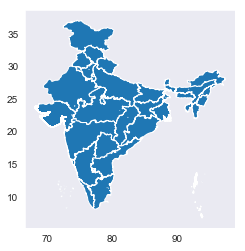

In [5]:
map_df.plot()

In [6]:
merged_2017 = map_df.set_index('st_nm').join(map_data_2017.set_index('State'))
merged_2018 = map_df.set_index('st_nm').join(map_data_2018.set_index('State'))
merged_2019 = map_df.set_index('st_nm').join(map_data_2019.set_index('State'))
merged_2017.head()

,geometry,MMR,IMR,GDP_PC,Year
st_nm,,,,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",313.76,21.16,159664.0,2017.0
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",87.81,5.79,130197.0,2017.0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",186.25,21.11,74183.0,2017.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",74.82,6.38,38630.0,2017.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",20.73,46.80,296434.0,2017.0


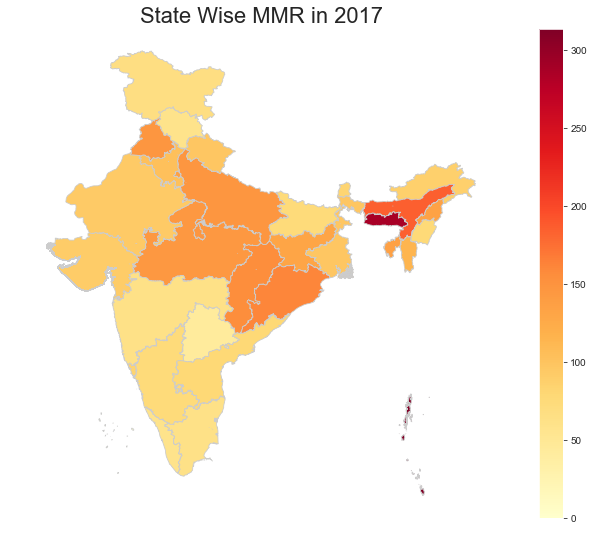

In [7]:
# Plots for 2017
fig, ax = plt.subplots(1, figsize=(15, 9))
ax.axis('off')
ax.set_title('State Wise MMR in 2017', fontdict={'fontsize': '22', 'fontweight' : '3'})
# plot the figure
merged_2017.plot(column='MMR', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [8]:
fig.savefig(r"C:\Users\Lenovo\Desktop\Data Preparation for Project\Map Based Outputs\State Wise MMR in 2017.png", dpi=300)

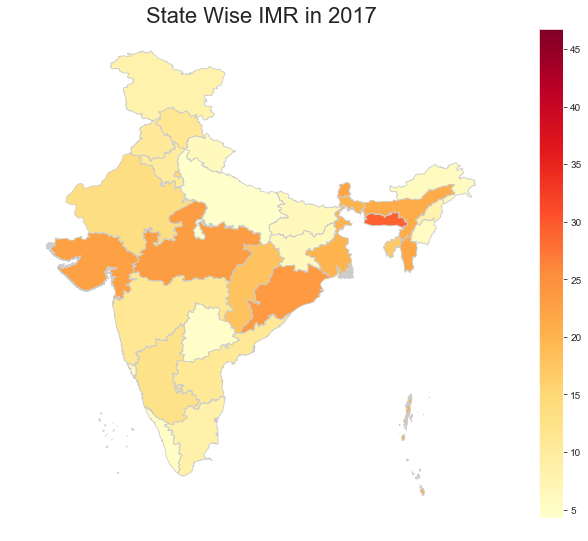

In [9]:
fig, aq = plt.subplots(1, figsize=(15, 9))
aq.axis('off')
aq.set_title('State Wise IMR in 2017', fontdict={'fontsize': '22', 'fontweight' : '3'})
# plot the figure
merged_2017.plot(column='IMR', cmap='YlOrRd', linewidth=0.8, ax=aq, edgecolor='0.8', legend=True)

In [10]:
fig.savefig(r"C:\Users\Lenovo\Desktop\Data Preparation for Project\Map Based Outputs\State Wise IMR in 2017.png", dpi=300)

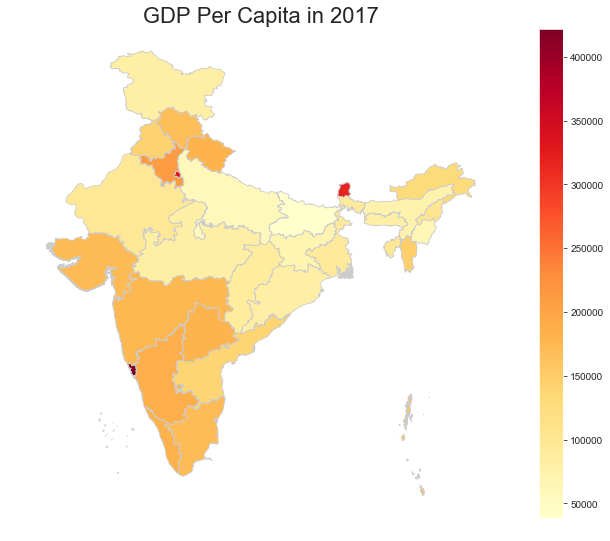

In [11]:
fig, ar = plt.subplots(1, figsize=(15, 9))
ar.axis('off')
ar.set_title('GDP Per Capita in 2017', fontdict={'fontsize': '22', 'fontweight' : '3'})
# plot the figure
merged_2017.plot(column='GDP_PC', cmap='YlOrRd', linewidth=0.8, ax=ar, edgecolor='0.8', legend=True)

In [12]:
fig.savefig(r"C:\Users\Lenovo\Desktop\Data Preparation for Project\Map Based Outputs\GDP Per Capita in 2017.png", dpi=300)

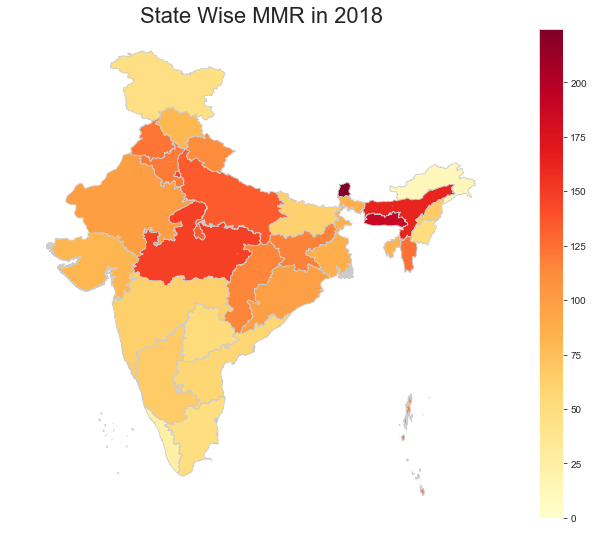

In [13]:
# Plots for 2018
fig, ax = plt.subplots(1, figsize=(15, 9))
ax.axis('off')
ax.set_title('State Wise MMR in 2018', fontdict={'fontsize': '22', 'fontweight' : '3'})
# plot the figure
merged_2018.plot(column='MMR', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [14]:
fig.savefig(r"C:\Users\Lenovo\Desktop\Data Preparation for Project\Map Based Outputs\State Wise MMR in 2018.png", dpi=300)

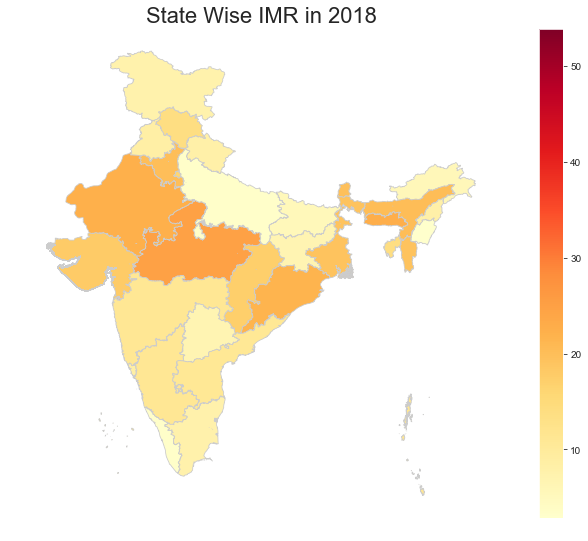

In [15]:
fig, ax = plt.subplots(1, figsize=(15, 9))
ax.axis('off')
ax.set_title('State Wise IMR in 2018', fontdict={'fontsize': '22', 'fontweight' : '3'})
# plot the figure
merged_2018.plot(column='IMR', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [16]:
fig.savefig(r"C:\Users\Lenovo\Desktop\Data Preparation for Project\Map Based Outputs\State Wise IMR in 2018.png", dpi=300)

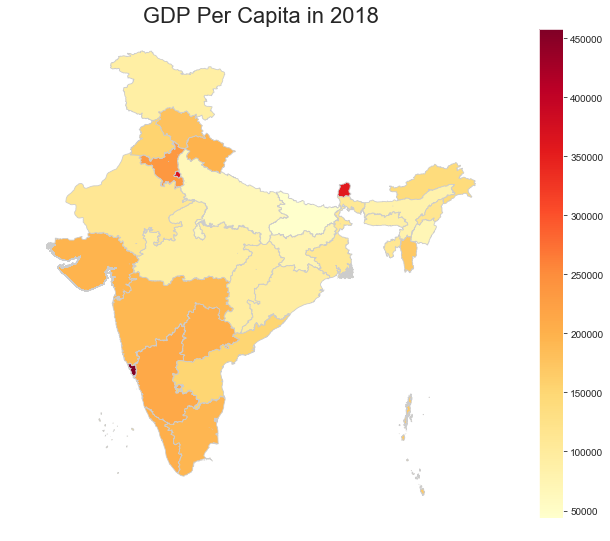

In [17]:
fig, ar = plt.subplots(1, figsize=(15, 9))
ar.axis('off')
ar.set_title('GDP Per Capita in 2018', fontdict={'fontsize': '22', 'fontweight' : '3'})
# plot the figure
merged_2018.plot(column='GDP_PC', cmap='YlOrRd', linewidth=0.8, ax=ar, edgecolor='0.8', legend=True)

In [18]:
fig.savefig(r"C:\Users\Lenovo\Desktop\Data Preparation for Project\Map Based Outputs\GDP Per Capita in 2018.png", dpi=300)

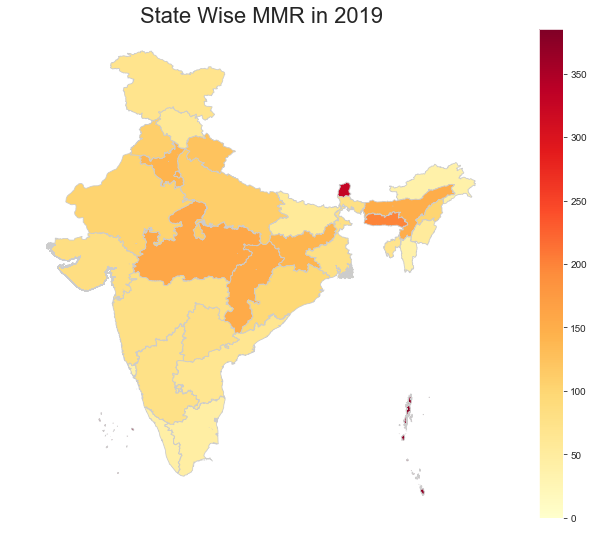

In [19]:
# Plots for 2019
fig, ax = plt.subplots(1, figsize=(15, 9))
ax.axis('off')
ax.set_title('State Wise MMR in 2019', fontdict={'fontsize': '22', 'fontweight' : '3'})
# plot the figure
merged_2019.plot(column='MMR', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [20]:
fig.savefig(r"C:\Users\Lenovo\Desktop\Data Preparation for Project\Map Based Outputs\State Wise MMR in 2019.png", dpi=300)

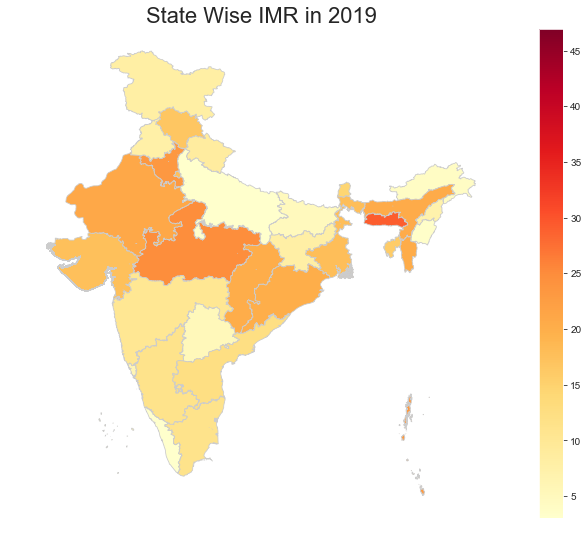

In [21]:
fig, ax = plt.subplots(1, figsize=(15, 9))
ax.axis('off')
ax.set_title('State Wise IMR in 2019', fontdict={'fontsize': '22', 'fontweight' : '3'})
# plot the figure
merged_2019.plot(column='IMR', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [22]:
fig.savefig(r"C:\Users\Lenovo\Desktop\Data Preparation for Project\Map Based Outputs\State Wise IMR in 2019.png", dpi=300)

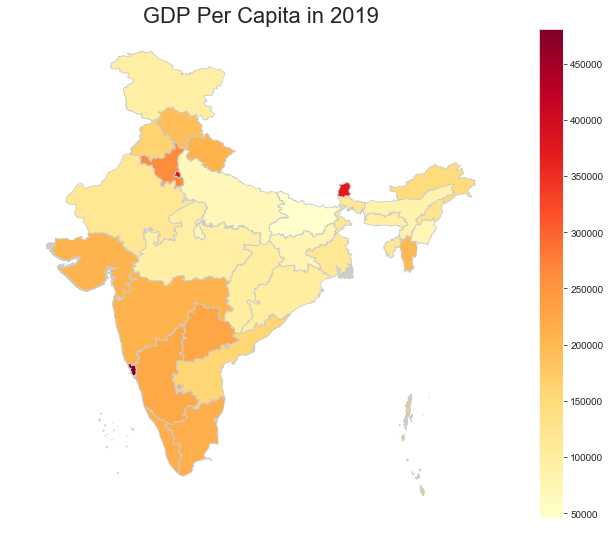

In [23]:
fig, ar = plt.subplots(1, figsize=(15, 9))
ar.axis('off')
ar.set_title('GDP Per Capita in 2019', fontdict={'fontsize': '22', 'fontweight' : '3'})
# plot the figure
merged_2019.plot(column='GDP_PC', cmap='YlOrRd', linewidth=0.8, ax=ar, edgecolor='0.8', legend=True)

In [24]:
fig.savefig(r"C:\Users\Lenovo\Desktop\Data Preparation for Project\Map Based Outputs\GDP Per Capita in 2019.png", dpi=300)

In [25]:
dp = r'C:\Users\Lenovo\Desktop\Data Preparation for Project\Map files\districtmap\gadm36_IND_2.shp'
map_dist = gpd.read_file(dp)
# map_dist.to_csv(r'C:\Users\Lenovo\Desktop\indiia\Project Data\mapdata.csv')
map_dist

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.1_1,Nicobar Islands,None,None,District,District,None,IN.AN.NI,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.2_1,North and Middle Andaman,None,None,District,District,None,IN.AN.NM,"MULTIPOLYGON (((92.93898 12.22386, 92.93916 12..."
2,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.3_1,South Andaman,None,None,District,District,None,IN.AN.SA,"MULTIPOLYGON (((92.47972 10.52056, 92.47945 10..."
3,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.1_1,Anantapur,"Anantpur, Ananthapur",None,District,District,None,IN.AD.AN,"POLYGON ((77.71420 13.76079, 77.71314 13.75074..."
4,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.2_1,Chittoor,Chitoor|Chittor,None,District,District,None,IN.AD.CH,"POLYGON ((78.46293 12.63537, 78.46190 12.63228..."
5,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.3_1,East Godavari,None,None,District,District,None,IN.AD.EG,"MULTIPOLYGON (((82.31735 16.57653, 82.31735 16..."
6,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.4_1,Guntur,None,None,District,District,None,IN.AD.GU,"MULTIPOLYGON (((80.78291 15.83764, 80.78291 15..."
7,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.5_1,Krishna,Kistna,None,District,District,None,IN.AD.KR,"MULTIPOLYGON (((81.02792 15.76569, 81.02792 15..."
8,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.6_1,Kurnool,None,None,District,District,None,IN.AD.KU,"POLYGON ((77.15276 15.13162, 77.13536 15.13601..."
9,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.7_1,Nellore,None,None,District,District,None,IN.AD.NE,"MULTIPOLYGON (((80.09708 13.64153, 80.09708 13..."


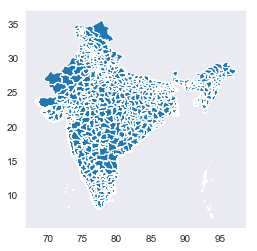

In [26]:
map_dist = map_dist[['NAME_2', 'geometry']]
map_dist.plot()